In [91]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler

In [5]:
bank_data=pd.read_csv('bank-full.csv',sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
bank_data.shape

(45211, 17)

In [7]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
bank_data.drop(labels=['day','month'],axis=1,inplace= True)

In [11]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [32]:
label=LabelEncoder() # initialize the labelencoder

In [33]:
bank_data['job']=label.fit_transform(bank_data.job)
bank_data['marital']=label.fit_transform(bank_data.marital)
bank_data['education']=label.fit_transform(bank_data.education)
bank_data['default']=label.fit_transform(bank_data.default)
bank_data['housing']=label.fit_transform(bank_data.housing)
bank_data['loan']=label.fit_transform(bank_data.loan)
bank_data['contact']=label.fit_transform(bank_data.contact)
bank_data['poutcome']=label.fit_transform(bank_data.poutcome)
bank_data['y']=label.fit_transform(bank_data.y)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,508,4,-1,0,3,0


# <u> Model Building

# train_test_split

In [69]:
x=bank_data.drop(labels='y',axis=1)
y=bank_data[['y']]

In [70]:
x.shape,y.shape

((45211, 14), (45211, 1))

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12,shuffle=True)

In [72]:
x_train.shape,y_train.shape

((36168, 14), (36168, 1))

In [73]:
x_test.shape,y_test.shape

((9043, 14), (9043, 1))

# <u>Model Training

In [74]:
logistic_model=LogisticRegression(class_weight={0:1,1:3})
logistic_model.fit(x_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 3})

In [75]:
logistic_model.coef_

array([[-5.14267274e-03,  1.35419281e-02, -2.03510893e-01,
         5.15737466e-02, -1.79714676e-02,  3.34419526e-05,
        -6.76447444e-01, -2.06152383e-01, -7.12039454e-01,
         4.49086858e-03, -1.22753876e-01, -1.09376973e-03,
         6.03475565e-02, -3.97480919e-01]])

In [76]:
logistic_model.intercept_

array([-0.21267153])

# <u>Model Test

# training accuracy 

In [77]:
y_pred_train=logistic_model.predict(x_train)

In [78]:
accuracy_score(y_train,y_pred_train)

0.8687237336872373

In [79]:
confusion_matrix(y_train,y_pred_train)

array([[29425,  2504],
       [ 2244,  1995]], dtype=int64)

In [80]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     31929
           1       0.44      0.47      0.46      4239

    accuracy                           0.87     36168
   macro avg       0.69      0.70      0.69     36168
weighted avg       0.87      0.87      0.87     36168



# ROC CURVE || AOC CURVE

In [83]:
roc_curve(y, logistic_model.predict_proba (x)[:,1])

(array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
        9.91483393e-01, 9.91483393e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
        1.        ]),
 array([1.99999999e+00, 9.99999995e-01, 9.99999899e-01, ...,
        7.24527904e-03, 7.19420380e-03, 1.69755773e-05]))

0.6961029311385486


Text(0, 0.5, 'True Positive Rate')

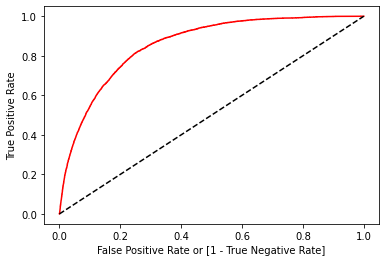

In [86]:
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# training accuracy

In [64]:
y_pred_test=logistic_model.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred_test)

0.8727192303439124

# Model Optimization

In [97]:
std_scaler=StandardScaler()
scaled_x=std_scaler.fit_transform(x)
scaled_x

array([[ 1.60696496, -0.10381968, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       [ 0.28852927,  1.42400783,  1.3683719 , ..., -0.41145311,
        -0.25194037,  0.44489814],
       [-0.74738448, -0.71495069, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       ...,
       [ 2.92540065,  0.20174582, -0.27576178, ...,  1.43618859,
         1.05047333, -0.56617504],
       [ 1.51279098, -1.02051619, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       [-0.37068857, -0.71495069, -0.27576178, ...,  1.4761376 ,
         4.52357654, -1.57724822]])

In [98]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.20,random_state=12,shuffle=True)

In [99]:
logistic_model.fit(x_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 3})

In [102]:
scly_pred_train=logistic_model.predict(x_train)

In [104]:
accuracy_score(y_train,scly_pred_train)

0.8779031187790312

In [105]:
confusion_matrix(y_train,scly_pred_train)

array([[29532,  2397],
       [ 2019,  2220]], dtype=int64)

In [106]:
print(classification_report(y_train,scly_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     31929
           1       0.48      0.52      0.50      4239

    accuracy                           0.88     36168
   macro avg       0.71      0.72      0.72     36168
weighted avg       0.88      0.88      0.88     36168



In [111]:
scaly_pred_test=logistic_model.predict(x_test)

In [114]:
accuracy_score(y_test,scaly_pred_test)

0.8822293486674776